<table style="width: 100%; border-style: none">
<tr style="border-style: none; background-color: #82a8cf">
<td style="border-style: none; width: 1%; text-align: left; font-size: 18px; color: #ffffff">Institut f&uuml;r Theoretische Physik<br /> <font color="#e6e6e6">Universit&auml;t zu K&ouml;ln </font></td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 18px; color: #ffffff">Prof. Dr. Simon Trebst<br /> <font color="#e6e6e6"> Christoph Berke </font> </td>
</tr>
</table>
<hr  style="height: 2px; border-color: #606060; background-color: #606060"> 
<h1 style="font-weight:200; text-align: center; margin: 0px; font-size: 48px; padding:0px; color: #606060">Statistische Physik </h1>
<h1 style="font-weight:light; text-align: center; margin: 10px; padding:0px; color: #606060">&Uuml;bungsblatt 14</h1>
<hr  style="height: 2px; border-color: #606060; background-color: #606060"> 
<h3 style="font-weight:400; text-align: center; margin: 0px; font-size: 20px; padding:0px; margin-bottom: 20px; color: #606060">Wintersemester 23/24</h3>


<font size="4" color="#606060">**Website:** <a href="https://www.thp.uni-koeln.de/trebst/Lectures/2023-StatPhys.shtml" style="color:#82a8cf; text-decoration: underline;text-decoration-style: dotted;">https://www.thp.uni-koeln.de/trebst/Lectures/2023-StatPhys.shtml</a></font>

<font size="4" color="#606060">**Abgabe**: <span style="color:#82a8cf"> 29.01.2024, 10:00 Uhr </span> <span style="float:right;">**Besprechung**: 30.01.2024 </span></font>

<font size="4" color="#606060">**Name**: <span style="color:#82a8cf"> Bitte geben Sie Ihren Namen an.  </span> </font>

<table style="border-style: none; width: 100%; background-color: #FFFFFF"><tr style="border-style: none;">
<td style="border-style: none; width:3%; text-align: left; font-size: 25px; font-weight: 200;background-color: #FFFFFF">Aufgabe 47: Das Ising-Modell </td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 15px;background-color: #FFFFFF">[10 + 2 Punkte]</td></tr></table> 

Nachdem wir uns in der letzten Woche ausführlich mit wechselwirkungsfreien Spins in einem Magnetfeld beschäftigt haben, ergänzen wir in dieser Woche Wechselwirkungen zwischen den Spins und betrachten das **Ising-Modell** (mit zusätzlichem Magnetfeld). Der Hamiltonoperator lautet dann

\begin{equation}
    H = -J \sum_{\langle \alpha,\beta \rangle} \sigma_\alpha \sigma_\beta -h \sum_{\alpha} \sigma_\alpha \,,
\end{equation}

wobei $\sigma_\alpha = \pm 1$. Der zweite Term ist bereits aus der letzten Woche vertraut, es wird dort über alle Plätze eines Gitters summiert. Wir betrachten wieder das Quadratgitter aus der untenstehenden Abbildung. Die Summe im ersten Summanden läuft über alle Paare $\langle \alpha, \beta \rangle$ nächster Nachbarn des Quadratgitters (siehe Abbildung).

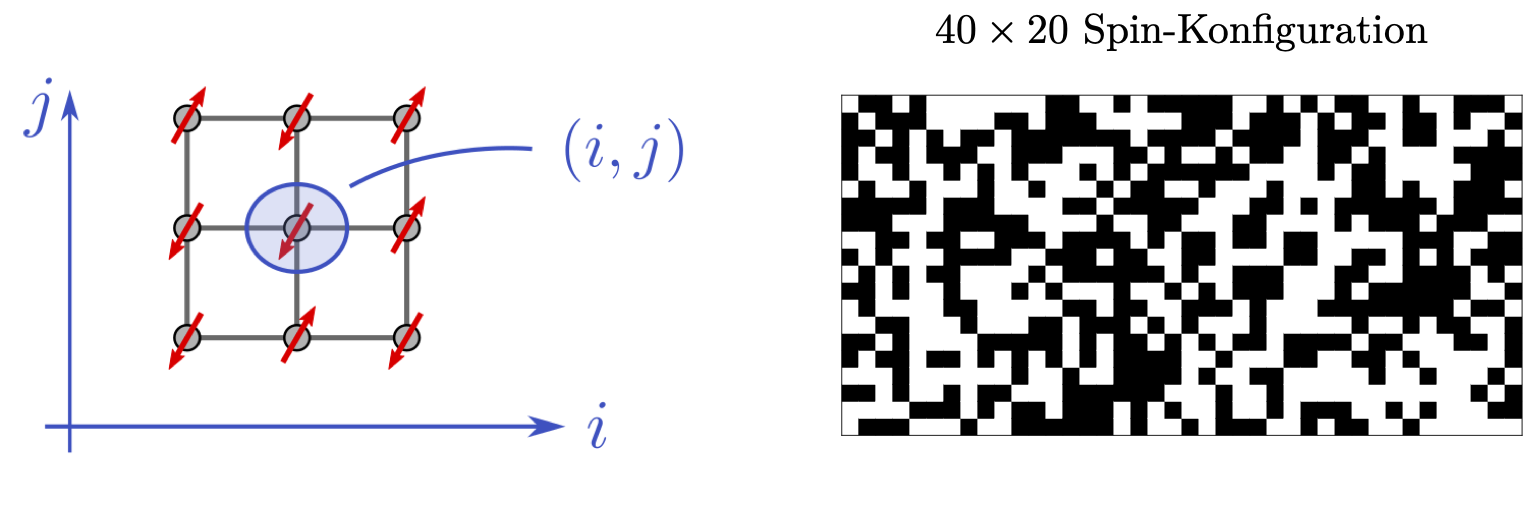

Analog zu letzter Woche, soll das Modell mittels einer Monte-Carlo-Simulation untersucht werden. Insbesondere sind wir an der Magnetisierung und der Wärmekapazität interessiert.

### a) Vorbereitung: Erzeugen zufälliger Spin-Konfigurationen
Wie in der letzten Woche definieren wir zunächst Funktionen, die zufällige Spin-Konfigurationen auf dem Quadratgitter erzeugen. Führen Sie die nachfolgenden Zellen aus.

In [ ]:
using CairoMakie

In [ ]:
# Erzeuge zufälligen Spin ±1
function get_Ising_spin()
    # Prüfe ob Zufallszahl zwischen 0 und 1 größer als 0.5 ist.
    if rand() > 0.5
        return +1 # 50 %
    else
        return -1 # 50 %
    end
end

# Erzeuge Lx×Ly-Array aus zufälligen Spins.
function get_Ising_spins(Lx, Ly)
    return [get_Ising_spin() for i in 1:Lx, j in 1:Ly]
end

### b) Implementierung des Metropolis-Algorithmus: Berechnung von $\Delta E$

Genau wie in der letzten Woche, benötigen wir wieder zwei Zutaten für den Metropolis-Algorithmus:
1. Eine Update-Vorschrift, um von einer Konfiguration der Markov-Kette in die nächste überzugehen.
2. Die Energiedifferenz $\Delta E$ der Konfigurationen nach und vor diesem Update.

Erneut betrachten wir Update-Vorschläge, bei denen ein einzelner Spin am Gitterplatz $\beta$ geflippt wird. Auf Grund der Wechselwirkung des Spins $\sigma_\beta$ mit seinen nächsten Nachbarn, ist die Berechnung der Energiedifferenz $\Delta E$ zwischen zwei Zuständen diesmal komplizierter. Überlegen Sie sich zunächst wie sich der Wechselwirkungsanteil der Energie bei Flippen eines einzelnen Spins ändert. Ergänzen Sie anschließend in der Funktion ```update_SSF!``` diese Energiedifferenz.

*Hinweis:* Die Funktion ```getNNsum(spins, i, j)``` berechnet die Summe der Spinwerte alle nächster Nachbarn des Spin an Position $(i,j)$ im Array ```spins```. Die Funktion kann bei der Berechnung der Energiedifferenz nützlich sein. 

In [ ]:
# Berechne die Summe aller Nachbar-Spins (mit periodischen Randbedingungen)
# für den Spin am Gitterplatz (i,j) des Arrays spins.
function getNNsum(spins, i,j)
    S = 0 # Variable für die Summe alle Nachbarn
    
     # Nachbar rechts (i+1,j)
    (i < size(spins,1)) ? S+=spins[i+1,j] : S+=spins[1, j]
        
    # Nachbar links (i-1,j)
    i > 1 ? S+=spins[i-1, j] : S+=spins[end, j]
    
    # Nachbar oben (i, j+1)
    j < size(spins,2) ? S += spins[i,j+1] : S += spins[i, 1]
    
    # Nachbar unten (i, j-1)
    j > 1 ? S += spins[i, j-1] : S += spins[i, end]
    
    return S
end

function update_SSF!(spins, J, h, T)
    # Update vorschlagen
    i = rand(1:size(spins, 1))
    j = rand(1:size(spins, 2))
    # dE ausrechnen
    dE = ### Ergänzen Sie hier den richtigen Ausdruck für die Energiedifferenz.
    # Akzeptieren Ja / Nein
    if rand() < exp(-dE / T)
        spins[i,j] *= -1 # Spin flip
        return
    else
        return # No spin flip
    end
end


Wir fassen erneut $N$ Update-Vorschläge für ein System aus $N$ Spins als Sweep zusammen und messen alle Observablen immer nur nach ganzen Sweeps.

In [ ]:
# Ein Sweep = Anzahl der Spins Update-Versuche.
function sweep_SSF!(spins, J, h, T)
    for _ in 1:length(spins)
        update_SSF!(spins, J, h, T)
    end
    return
end

# Magnetisierung definieren
function get_magnetization(spins)
    return sum(spins)
end

### c) Magnetisierungs $M$ als Funktion des Magnetfeldes $h$

Stellen Sie, wie in der vergangenen Woche, die Magnetisierung $M$ als Funktion des äußeren Magnetfelds für verschiedene Temperaturen dar. Vergleichen Sie das Verhalten des wechselwirkenden Systems ($J=1$) mit dem des wechselwirkungsfreien Systems ($J=0$).

*Hinweise:* Betrachten Sie zunächst etwas kleinere Systemgrößen als beim wechselwirkungsfreien Fall von letzter Woche, etwa ein Quadratgitter aus $20 \times 20$ Spins. Für den Vergleich mit dem nicht-wechselwirkenden System können Sie auf die analytisch bekannte Lösung (siehe letzte Woche) zurückgreifen.

In [ ]:
# Temperaturen, Wechselwirkung und Feldstärke
Ts = [0.1,2.0,5.0,10.0,50]
J = 1
hvals = range(-10.0, 10.0, length=31)

# Anzahl Sweeps für Thermalisierung und Messung
sweepT, sweepM = 1000, 1000

### d) Magnetisierung $M$ als Funktion der Temperatur $T$ bei $h=0$

Das Besondere am zweidimensionalen Ising-Modell ist, dass das System unterhalb einer kritischen Temperatur $T_c$ auch ohne äußeres Magnetfeld eine endliche Magnetisierung aufweist. Setzen Sie $h = 0$, berechnen Sie die Magnetisierung für die gegebenen Temperaturen und stellen Sie Ihre Ergebnisse dar.

In [ ]:
# Temperaturen, Wechselwirkung und Feldstärke
Ts = range(5,0.1,length = 25)
J = 1
h = 0

# Anzahl Sweeps für Thermalisierung und Messung
sweepT, sweepM = 10000, 1000

### e) Wärmekapazität $c_V$ als Funktion der Temperatur

Wir betrachten weiter den Fall $h=0$ und sind jetzt an der Wärmekapazität  

\begin{equation}
    c_V = \frac{1}{N}\left(\frac{\partial \langle E \rangle}{\partial T}\right)_V
\end{equation}

interessiert.
Diese kann auch durch die Mittelwerte $\langle E \rangle$ und $\langle E^2 \rangle$ ausgedrückt werden:

\begin{equation}
    c_V = \frac{1}{T^2 N} \left(\langle E^2 \rangle - \langle E \rangle^2 \right)
\end{equation}

(Optional: Machen Sie sich diesen Zusammenhang klar. Benutzen Sie dabei den Zusammenhang zwischen der kanonischen Zustandssumme und der rechten Seite der Gleichung, siehe S.39 im Skript, sowie die Definition der Wärmekapazität. Keine Abgabe.)

Wir arbeiten mit dem zweiten Ausdruck und müssen deshalb die Gesamtenergie des Spin-Arrays berechnen. (Bisher haben wir nur den Energieunterschied bei Flippen eines Spins berechnet. Das war möglich, ohne die Gesamtenergie zu kennen.)

Implementieren Sie eine Funktion, die die Gesamtenergie des Ising-Modells berechnet.

Berechnen Sie jetzt die Wärmekapazität $c_V(T)$ für die unten vorgegebenen Temperaturen. Betrachten Sie ein $10 \times 10$ Array. Lassen Sie das System vor Beginn der Messungen lange genug thermalisieren, etwa für $10{,}000$ Sweeps. Messen Sie anschließend mindestens $50{,}000$ mal. Stellen Sie Ihr Ergebnis dar.

**Optional (2 Bonus-Punkte):** Wiederholen Sie die Rechnung für verschiedene Systemgrößen $L\times L$, etwa $L=2,4,6,8,10,12$. Stellen Sie alle Ergebnisse in einem gemeinsamen Plot dar. Interpretieren Sie Ihr Ergebnis und schätzen Sie die kritische Temperatur ab.

In [ ]:
# Wechselwirkung, Feldstärke, Temperaturen
J, h = +1, 0
Ts = sort(unique(vcat(0.2:0.2:8, 1:0.1:4, 2:0.05:3.0)))